# Classificaton with Python


Outline:
* Part I
    * Load & Explore Data
        * Data Understanding
    * Data Analysis
        * Exploratory Data Analysis
        * Data Preparation


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 0. Libraries

Cell berikut berisikan semua _library_ yang akan kita gunakan.

> Urutan penulisan _library_ mengikuti konvensi [PEP8](https://peps.python.org/pep-0008/)

In [1]:
import math
from collections import Counter, defaultdict
from functools import partial
from pprint import pprint

import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
                            classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.style.use("fivethirtyeight")

## 1. Data Loading & Exploration

Ada 1 dataset yang akan digunakan:
1. [Personal Key Indicators of Heart Disease](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)

### 1.2 Personal Key Indicators for Health Disease

Dataset ini merupakan data survei CDC tahun 2020 dari 400k orang dewasa yang berkaitan dengan kondisi kesehatan mereka. Dengan menggunakan dataset ini, kita akan membuat sebuah model untuk mengklasifikasikan apakah seseorang dengan kondisi kesehatan tertentu memiliki sakit jantung atau tidak yang direpresentasikan oleh fitur `HeartDisease`.

Dataset ini dapat diambil dari [Kaggle](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease).

In [2]:
df_heart = pd.read_csv("heart_2020_cleaned.csv")

In [3]:
df_heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## 2. Exploratory Data Analysis


**Data Dictionary**:

| column | description |
| ------ | ----------- |
| `HeartDisease` | Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) |
| `BMI` | Body Mass Index (BMI) |
| `Smoking` | Have you smoked at least 100 cigarettes in your entire life? *(Note: 5 packs = 100 cigarettes)* |
| `AlcoholDrinking` | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week |
| `Stroke` | (Ever told) (you had) a stroke? |
| `PhysicalHealth` | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 |
| `MentalHealth` | Thinking about your mental health, for how many days during the past 30 days was your mental health not good? |
| `DiffWalking` | Do you have serious difficulty walking or climbing stairs? |
| `Sex` | Are you male of female |
| `AgeCategory` | Fourteen-level age category |
| `Race` | Imputed race/ethnicity value |
| `Diabetic` | (Ever told) (you had) diabetes? |
| `PhysicalActivity` | Adults who reported doing physical activity or exercise during the past 30 days other than their regular job |
| `GenHealth` | Would you say that in general your health is... |
| `SleepTime` | On average, how many hours of sleep do you get in a 24-hour period? |
| `Asthma` | (Ever told) (you had) asthma? |
| `KidneyDisease` | Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease? |
| `SkinCancer` | (Ever told) (you had) skin cancer? |

In [5]:
numerical_features = df_heart.select_dtypes(include="number").columns.tolist()
categorical_features = df_heart.select_dtypes(include="object").columns.tolist()

print("Numerical features:")
pprint(numerical_features)
print("Categorical features:")
pprint(categorical_features, compact=True)

Numerical features:
['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
Categorical features:
['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma',
 'KidneyDisease', 'SkinCancer']


### 2.1 Summary Statistic

In [6]:
df_heart[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


Dari summary di atas:
* Median dari `PhysicalHealth` dan `MentalHealth` lebih kecil daripada rata-rata nya, sehingga kemungkinan distribusinya left-skewed
* Kebanyakan nilai `PhysicalHealth` dan `MentalHealth` antara 0 sampai 3 (dari Q1 sampai Q3), sehingga kemungkinan terdapat banyak pencilan
* Ada baris yang nilai `SleepTime` nya 24 jam, apakah ini berarti ia tidur selama seharian?


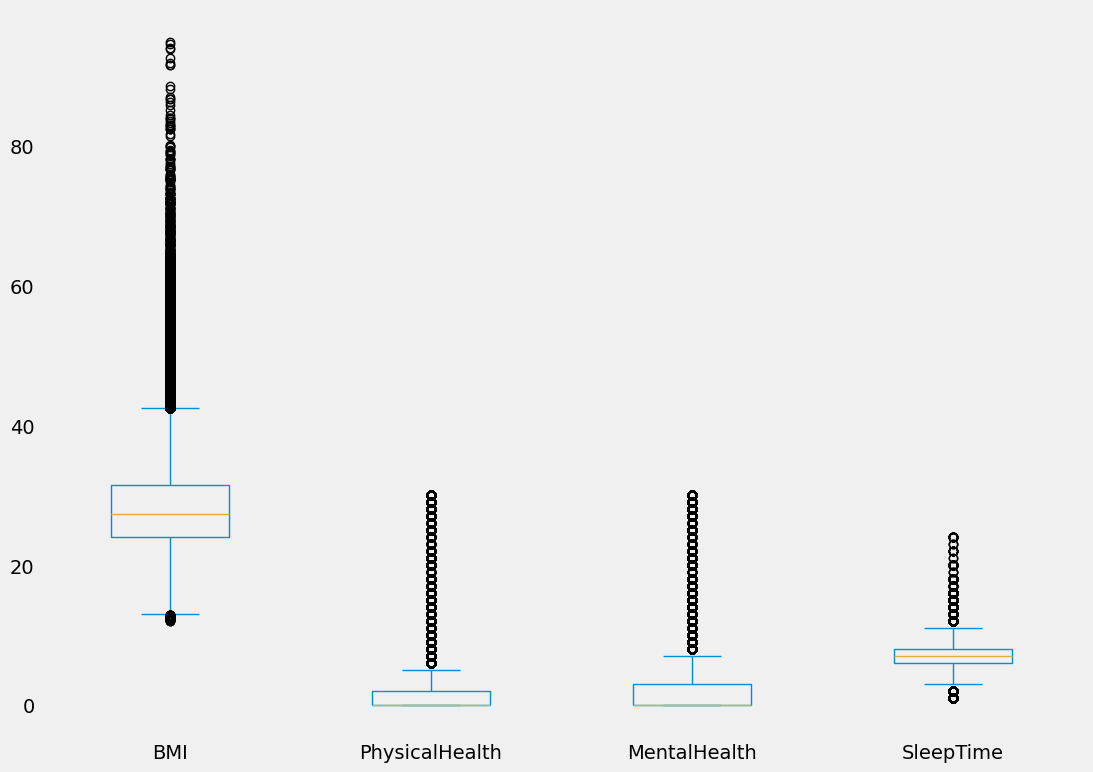

In [7]:
df_heart[numerical_features].plot(kind="box", figsize=(12, 9))
plt.grid(False)
plt.show()

Dari visualisasi box plot di atas:
* Semua distribusi `BMI`, `PhysicalHealth`, `MentalHealth`, `SleepTime` terlihat right-skewed
* Meski begitu, nilai rata-rata dan median `BMI` dan `SleepTime` cenderung sama

Selain menggnakan boxplot seperti di atas, kita juga bisa menggunakan violin plot seperti di bawah ini untuk mengetahui bentuk kurva distribusi masing-masing fitur dengan lebih jelas

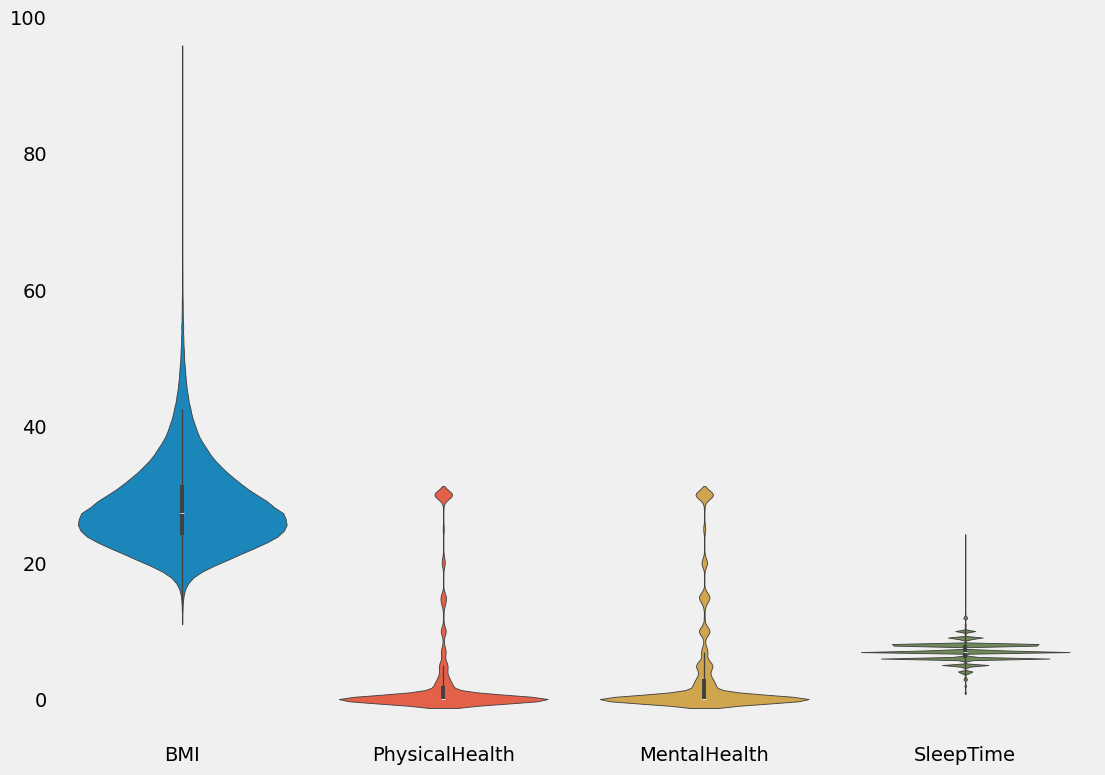

In [8]:
plt.figure(figsize=(12, 9))
sns.violinplot(data=df_heart[numerical_features])
plt.grid(False)
plt.show()

In [9]:
df_heart[categorical_features].describe().T

,count,unique,top,freq
HeartDisease,319795,2,No,292422
Smoking,319795,2,No,187887
AlcoholDrinking,319795,2,No,298018
Stroke,319795,2,No,307726
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
AgeCategory,319795,13,65-69,34151
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
PhysicalActivity,319795,2,Yes,247957


### 2.2 Correlation

In [10]:
df_heart[numerical_features].corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


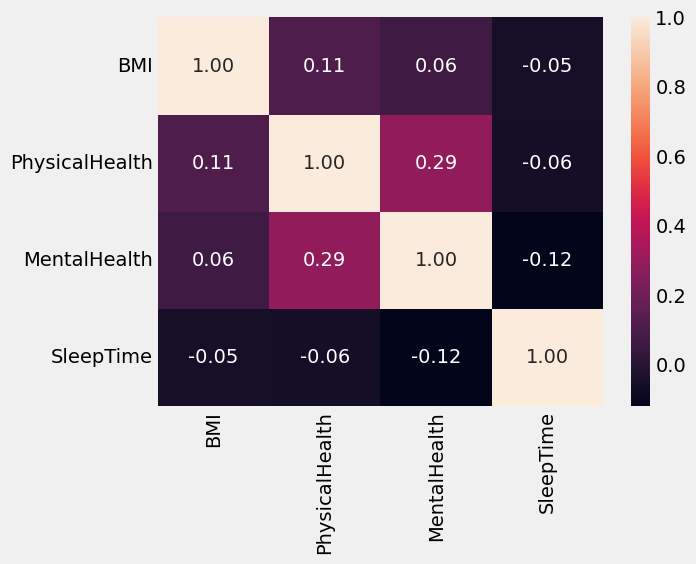

In [11]:
sns.heatmap(df_heart[numerical_features].corr(), annot=True, fmt=".2f")
plt.show()

### 2.3 EDA on Categorical Features

In [12]:
df_heart[categorical_features].head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No


### 2.4 Number of Unique Values

In [13]:
df_heart[categorical_features].nunique()

,0
HeartDisease,2
Smoking,2
AlcoholDrinking,2
Stroke,2
DiffWalking,2
Sex,2
AgeCategory,13
Race,6
Diabetic,4
PhysicalActivity,2


### 2.5 Count of Unique Values

In [14]:
for feature in categorical_features:
    print(df_heart[feature].value_counts())

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64
Smoking
No     187887
Yes    131908
Name: count, dtype: int64
AlcoholDrinking
No     298018
Yes     21777
Name: count, dtype: int64
Stroke
No     307726
Yes     12069
Name: count, dtype: int64
DiffWalking
No     275385
Yes     44410
Name: count, dtype: int64
Sex
Female    167805
Male      151990
Name: count, dtype: int64
AgeCategory
65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: count, dtype: int64
Race
White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: count, dtype: int64
Diabetic
No           

### 2.5 Visualization

#### 2.5.1 Age Category

/tmp/ipython-input-2724650544.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


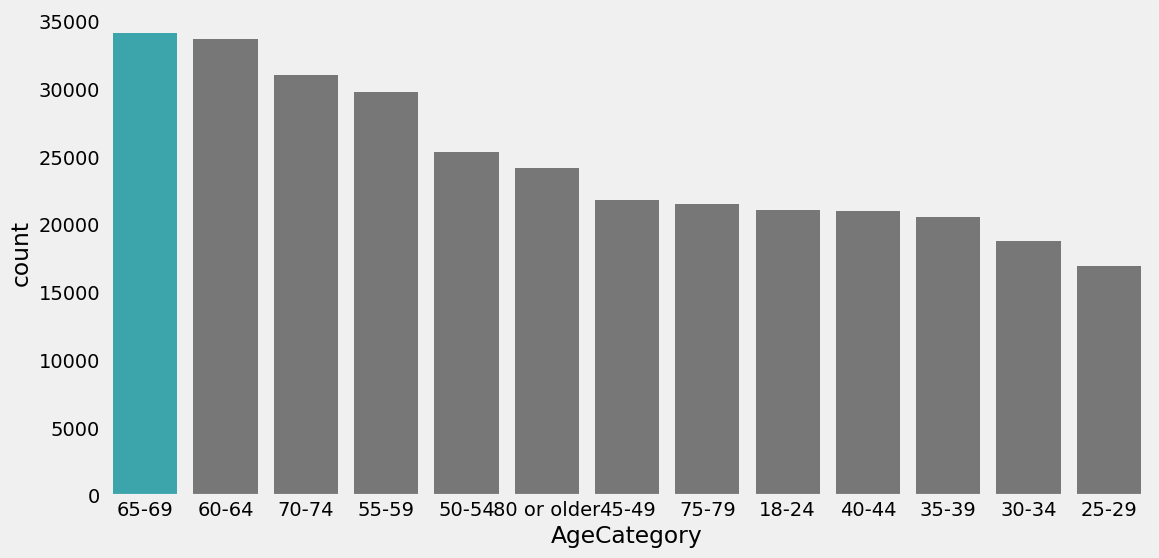

In [15]:
age_category_order = df_heart.AgeCategory.value_counts().index

plt.figure(figsize=(12, 6))
sns.countplot(
    x="AgeCategory",
    data=df_heart,
    order=age_category_order,
    palette=["#29B5BF"] + (len(age_category_order)-1)*["#777777"]
)
plt.grid(False)
plt.show()

Dari visualisasi di atas, terlihat bahwa kategori umum **65-69** paling banyak dijumpai.

Untuk kemudahan visualisasi fitur yang lain, kita akan menggunakan fungsi berikut.

In [16]:
def plot_count(x, data=df_heart, palette=None, figsize=(12, 6)):
    column_order = data[x].value_counts().index

    plt.figure(figsize=figsize)
    sns.countplot(
        x=x, data=data, order=column_order,
        palette=palette
    )
    plt.grid(False)
    plt.show()

#### 2.5.2 Race

/tmp/ipython-input-118801842.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


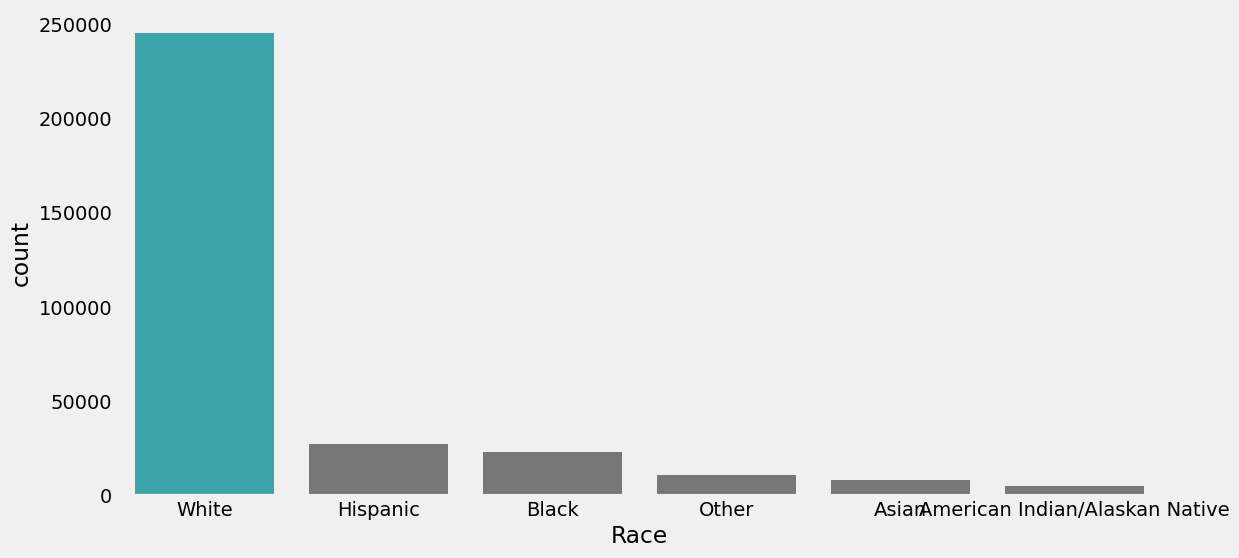

In [17]:
race_order = df_heart["Race"].value_counts().index
plot_count("Race", palette=["#29B5BF"] + (len(race_order)-1)*["#777777"])

Terlihat bahwa dari 6 suku yang ada, `White` menjadi yang paling banyak. Sedangkan untuk `Asian` berada pada urutan 2 terakhir.

#### 2.5.3 General Health

/tmp/ipython-input-118801842.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-118801842.py:5: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.countplot(


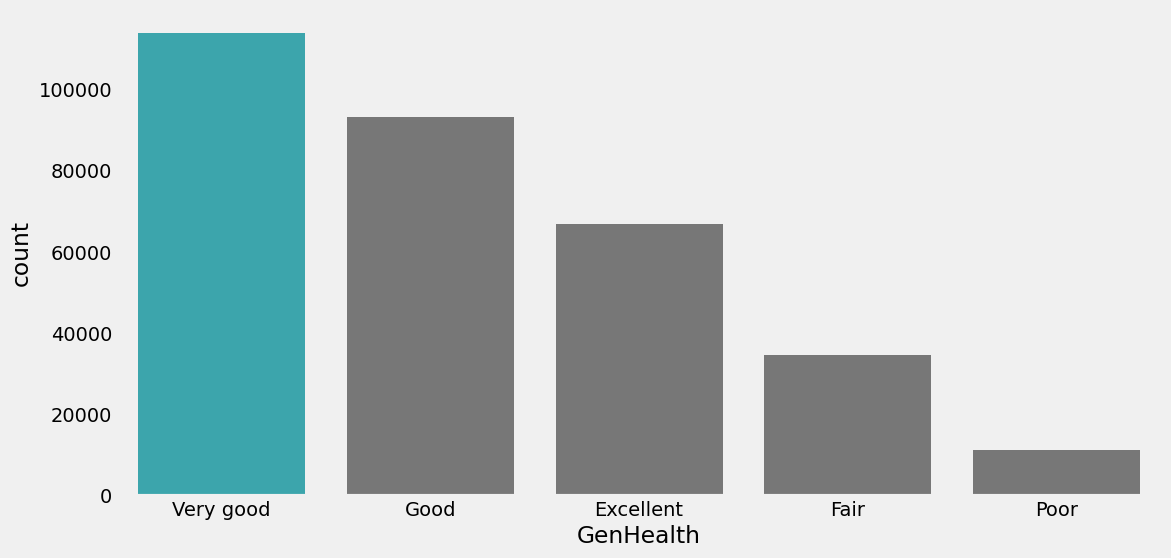

In [18]:
gen_health_order = df_heart["Race"].value_counts().index
plot_count(
    "GenHealth",
    palette=["#29B5BF"] + (len(gen_health_order)-1)*["#777777"]
)

Dari visualisasi di atas, bisa disimpulkan bahwa kebanyakan responden sangat percaya bahwa kondisi kesehatan mereka secara umum sangat baik.

#### 2.5.4 Sex

/tmp/ipython-input-118801842.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


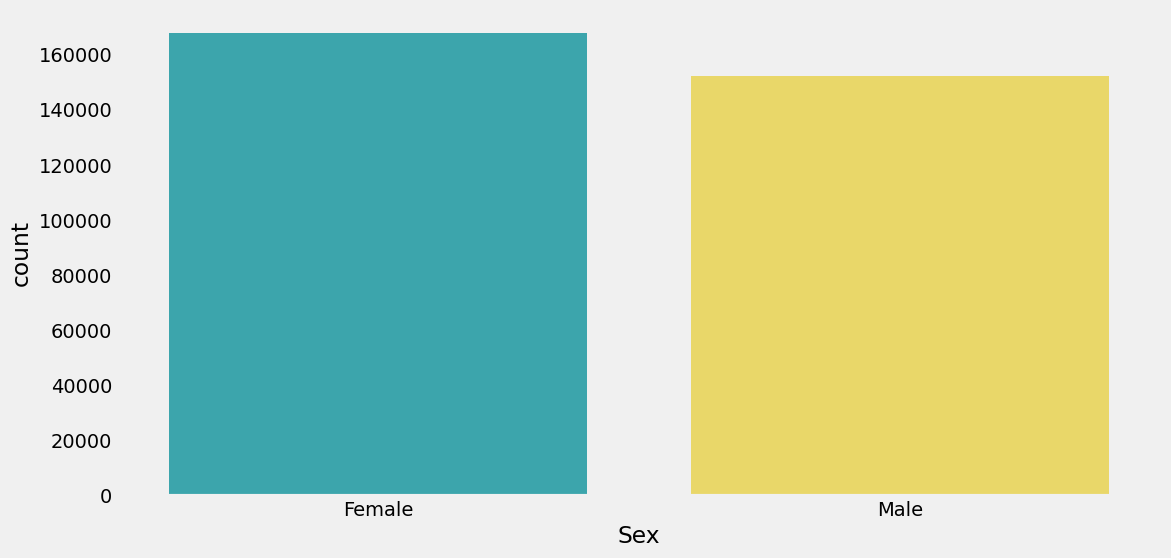

In [19]:
sex_order = df_heart["Sex"].value_counts().index
plot_count(
    "Sex",
    palette=["#29B5BF", "#FFE653"]
)

Antara laki-laki dan perempuan, proporsi responden hampir berimbang. Meskipun, persentase perempuan sedikit lebih banyak dibandingkan laki-laki.